In [1]:
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# LOADED (keep 'X' and 'y')
data = load_wine()
X = data.data
y = data.target 
print("Dataset feature matrix:", X)
print("Dataset target vector:", y)

# MANUAL (keep 'data_points')
# data_points = np.array([[0,0],[1,0],[0,1],[1,1]])
# Initial centers
# centers_init = np.array([[0,0],[1,0]])

Dataset feature matrix: [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Dataset target vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# KMeans Algorithm (No change)
def k_means(data_points, centers_init, n_clusters, max_iterations=100, tol=1e-4):
  centers = centers_init.copy()
  for _ in range(max_iterations):
    distances = np.linalg.norm(data_points[:, np.newaxis] - centers, axis=2)
    closest_centroids = np.argmin(distances, axis=1)
    new_centers = np.zeros((n_clusters, data_points.shape[1]))
    for i in range(n_clusters):
      new_centers[i] = data_points[closest_centroids == i].mean(axis=0)
    if np.linalg.norm(new_centers - centers) < tol:
      break
    centers = new_centers
  return centers, closest_centroids

In [ ]:
# LOADED (Change seed, n_clusters range)
J = {}
np.random.seed(42)
for n_clusters in range(2, 11):
    centers_init = X[np.random.choice(X.shape[0], n_clusters, replace=False)]  
    centers, labels = k_means(X, centers_init, n_clusters=n_clusters)
    within_cluster_var = np.sum((X - centers[labels]) ** 2)
    J[n_clusters] = within_cluster_var
    print(f"Converged centers for {n_clusters} clusters:", centers)
    print(f"Within-cluster variance for {n_clusters} clusters:", within_cluster_var)
    
# MANUAL (No change)
# print(data_points[:, np.newaxis])
# data_points[:, np.newaxis].shape
# data_points[:, np.newaxis] - centers_init
# np.linalg.norm(data_points [:, np.newaxis] - centers_init, axis=2)
# centers, labels = k_means(data_points, centers_init, n_clusters=2)
# print("Converged centers :", centers)
# print("cluster Labels :", labels)

Converged centers for 2 clusters: [[1.27028455e+01 2.54455285e+00 2.33910569e+00 2.04081301e+01
  9.68130081e+01 2.06211382e+00 1.64146341e+00 3.92682927e-01
  1.45406504e+00 4.85138211e+00 9.08617886e-01 2.40821138e+00
  5.65869919e+02]
 [1.36665455e+01 1.87072727e+00 2.42781818e+00 1.74527273e+01
  1.06290909e+02 2.81618182e+00 2.89654545e+00 2.92909091e-01
  1.89690909e+00 5.52036364e+00 1.06665455e+00 3.06672727e+00
  1.15172727e+03]]
Within-cluster variance for 2 clusters: 4543749.614531862
Converged centers for 3 clusters: [[1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226

Text(0, 0.5, 'Within-cluster variance')

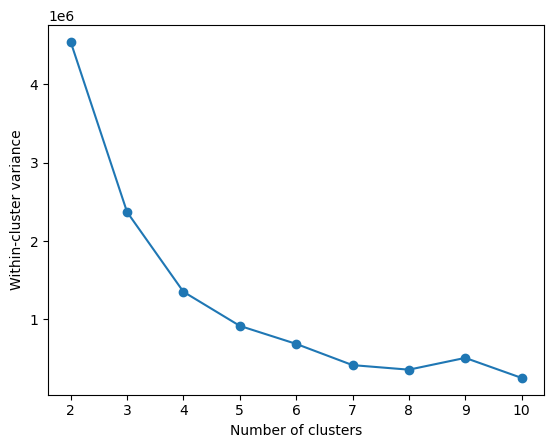

In [4]:
# LOADED (No change)
plt.plot(J.keys(), J.values(), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster variance')

# MANUAL (No change)
# plt.scatter(data_points[:, 0], data_points[:, 1], c=labels, cmap='viridis', marker='o')
# plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centroids')
# plt.title('K-Means Clustering')